In [1]:
import gym
import d4rl # Import required to register environments
import numpy as np
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.cluster import KMeans

No module named 'flow'
No module named 'carla'
pybullet build time: Mar  7 2022 18:18:14


In [2]:
name = "halfcheetah-expert-v2"
env = gym.make(name)
dataset = env.get_dataset()
actions = dataset['actions']
observations = dataset['observations']
rewards = dataset['rewards']

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 13.32it/s]


In [3]:
action_feature = KMeans(n_clusters=10).fit(actions).fit_predict(actions)
state_feature = KMeans(n_clusters=10).fit(observations).fit_predict(observations)

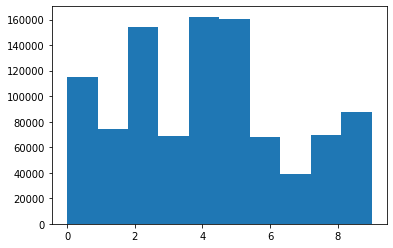

In [4]:
plt.hist(action_feature, bins=10)
plt.show()

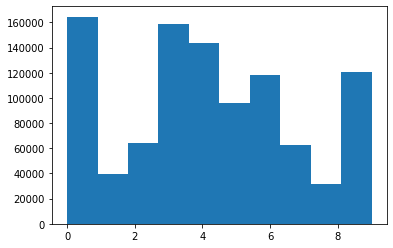

In [5]:
plt.hist(state_feature, bins=10)
plt.show()

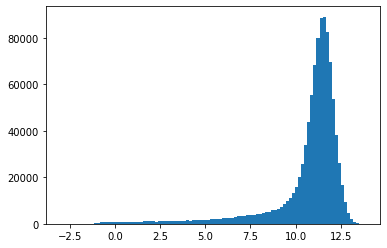

In [32]:
plt.hist(rewards, bins=100)
plt.show()

In [11]:
def draw_kmeans_fluctuation_scatter_plot(data_name="halfcheetah-expert-v2",
                                         action_obs_reward='actions',
                                         total_trajectory_len=10000,
                                         sub_trajectory_len=100,
                                         n_clusters=10
                                         ):
    # load data
    env = gym.make(data_name)
    dataset = env.get_dataset()
    data = dataset[action_obs_reward]
    data = data[:total_trajectory_len, :]
    feature = KMeans(n_clusters=n_clusters).fit(data).fit_predict(data)
    
    # count actions per sub-trajectories
    num_sub_trajectory = total_trajectory_len // sub_trajectory_len
    count_subsequences = np.zeros((num_sub_trajectory, len(np.unique(feature))))
    for i in tqdm(range(num_sub_trajectory)):
        feature_sub_seq = feature[i * sub_trajectory_len: (i + 1) * sub_trajectory_len]
        for feat in feature_sub_seq:
            for j, feature_class in enumerate(np.unique(feature)):
                if feat == feature_class:
                    count_subsequences[i, j] += 1
    
    # calculate mean and standard deviation per sub-trajectory
    mean_list = [count_subsequences[:, i].mean() for i in range(count_subsequences.shape[1])]
    std_list = [count_subsequences[:, i].std() for i in range(count_subsequences.shape[1])]
    
    # plot scatter
    plt.scatter(mean_list, std_list)
    plt.title(data_name)
    
    # linear fitting
    linear_model=np.polyfit(np.log(mean_list), np.log(std_list), 1)
    linear_model_fn=np.poly1d(linear_model)
    plt.plot(mean_list, np.exp(linear_model_fn(np.log(mean_list))), label=r'$\alpha$' + f': {linear_model[0]:.3f}', color='red')
    
    # plot
    plt.yscale('log')
    plt.xscale('log')
    plt.legend()
    plt.xlabel(f'Mean frequency of {action_obs_reward} over sub-trajectories')
    plt.ylabel(f'Std of frequency of {action_obs_reward} over sub-trajectories')
    plt.show()

## Plot

### Gym-MuJoCo

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|██████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 13.78it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

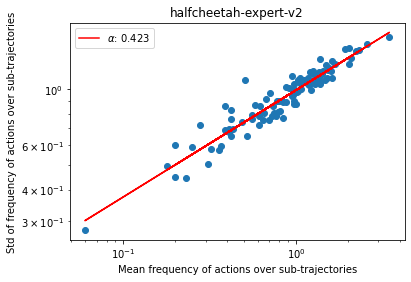

In [14]:
draw_kmeans_fluctuation_scatter_plot(
    data_name='halfcheetah-expert-v2',
    n_clusters=100,
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|██████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 13.81it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

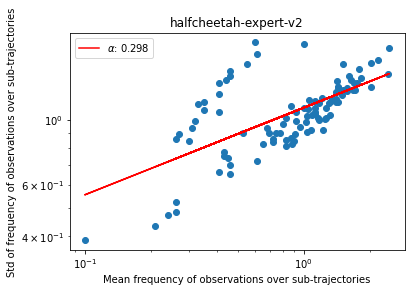

In [15]:
draw_kmeans_fluctuation_scatter_plot(
    data_name='halfcheetah-expert-v2',
    n_clusters=100,
    action_obs_reward='observations')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|██████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 20.66it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

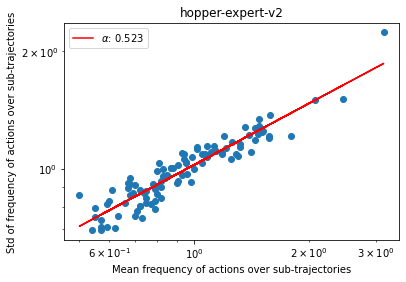

In [16]:
draw_kmeans_fluctuation_scatter_plot(
    data_name='hopper-expert-v2',
    n_clusters=100,
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|██████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 20.30it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

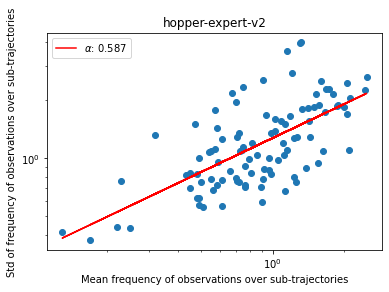

In [17]:
draw_kmeans_fluctuation_scatter_plot(
    data_name='hopper-expert-v2',
    n_clusters=100,
    action_obs_reward='observations')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|██████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 14.27it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

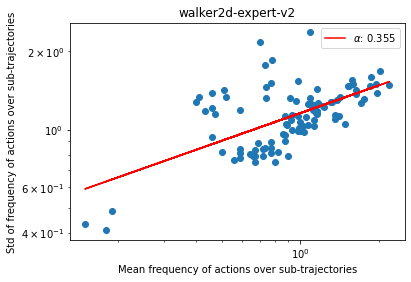

In [18]:
draw_kmeans_fluctuation_scatter_plot(
    data_name='walker2d-expert-v2',
    n_clusters=100,
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|██████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 14.25it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

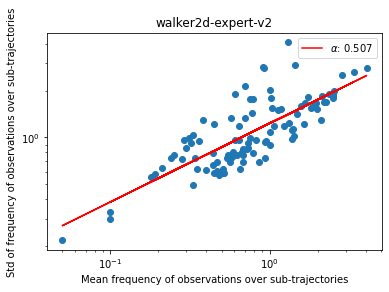

In [19]:
draw_kmeans_fluctuation_scatter_plot(
    data_name='walker2d-expert-v2',
    n_clusters=100,
    action_obs_reward='observations')

### Maze2D

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `maze2d-large-v1` instead of the unversioned environment `maze2d-large`
  logger.warn(
load datafile: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.04it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

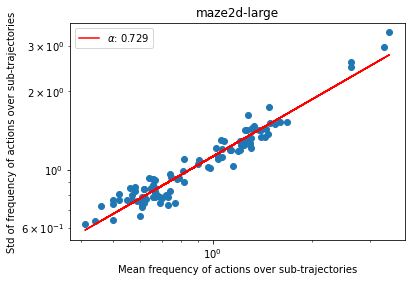

In [20]:
draw_kmeans_fluctuation_scatter_plot(
    data_name='maze2d-large',
    n_clusters=100,
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `maze2d-large-v1` instead of the unversioned environment `maze2d-large`
  logger.warn(
load datafile: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00,  8.04it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

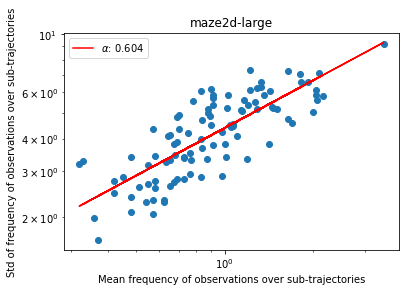

In [21]:
draw_kmeans_fluctuation_scatter_plot(
    data_name='maze2d-large',
    n_clusters=100,
    action_obs_reward='observations')

## AntMaze

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `antmaze-large-play-v2` instead of the unversioned environment `antmaze-large-play`
  logger.warn(
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Target Goal:  (32.75745843363844, 24.440156578302396)


load datafile: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.12it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

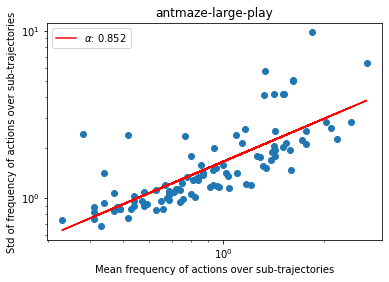

In [22]:
draw_kmeans_fluctuation_scatter_plot(
    data_name='antmaze-large-play',
    n_clusters=100,
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `antmaze-large-play-v2` instead of the unversioned environment `antmaze-large-play`
  logger.warn(
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Target Goal:  (32.82906235766107, 24.254174943976185)


load datafile: 100%|████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.00it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

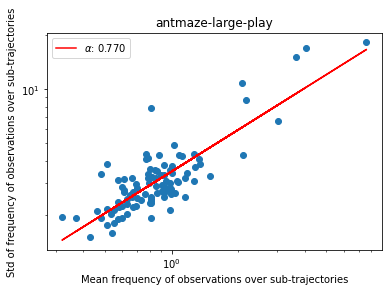

In [23]:
draw_kmeans_fluctuation_scatter_plot(
    data_name='antmaze-large-play',
    n_clusters=100,
    action_obs_reward='observations')

## Adroit

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `relocate-expert-v1` instead of the unversioned environment `relocate-expert`
  logger.warn(
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|██████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  4.89it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

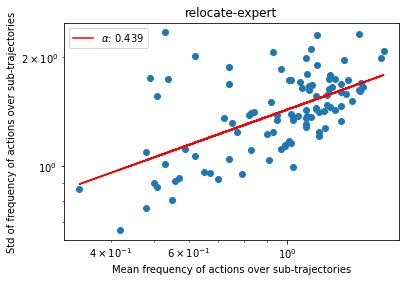

In [24]:
draw_kmeans_fluctuation_scatter_plot(
    data_name='relocate-expert',
    n_clusters=100,
    action_obs_reward='actions')

/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/envs/registration.py:511: UserWarning: WARN: Using the latest versioned environment `relocate-expert-v1` instead of the unversioned environment `relocate-expert`
  logger.warn(
/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|██████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.73it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

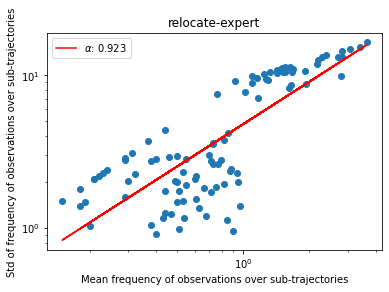

In [25]:
draw_kmeans_fluctuation_scatter_plot(
    data_name='relocate-expert',
    n_clusters=100,
    action_obs_reward='observations')

## FrankaKitchen

Reading configurations for Franka
Initializing Franka sim


/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 45.54it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

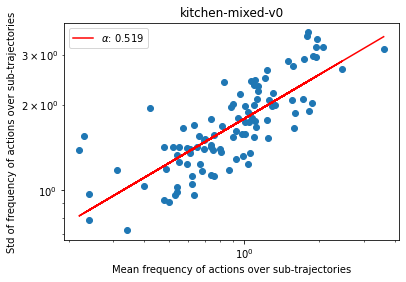

In [26]:
draw_kmeans_fluctuation_scatter_plot(
    data_name='kitchen-mixed-v0',
    n_clusters=100,
    action_obs_reward='actions')

Reading configurations for Franka
Initializing Franka sim


/Users/shiro/miniforge3/envs/wikirl-gym/lib/python3.8/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
load datafile: 100%|████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 46.02it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

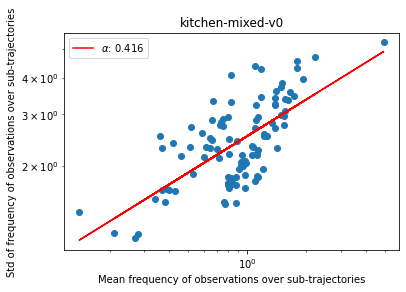

In [27]:
draw_kmeans_fluctuation_scatter_plot(
    data_name='kitchen-mixed-v0',
    n_clusters=100,
    action_obs_reward='observations')